# XGBoost Example - HSC Photo-z

Zooey Nguyen, 2021-08-10

Adapted from `ML Template - HSC Photo-z`


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from RedshiftModel import RedshiftModel

# 1 Big Picture

What is the problem you want to solve? How do you plan to use and benefit from the the machine learning model? What is your metric for success?

Goal: develop a baseline set of characterization of the HSC v4 dataset. Systematically explore the dataset. 

# 2 Get the data

What data are available to you for training your model? How will you access and download all the data? The type and quantity of data available will often impact your choice in the subsequent stages.



In [2]:
model = RedshiftModel()
model.load_data(path='/data/HSC/HSC_v6/HSC_v6.csv')

# 3 Explore the data

Discover and visualize the data to gain insight. For example, how complete is the dataset? Are there more representatives of certain types of data than others?


In [3]:
model.df

,g_cmodel_mag,r_cmodel_mag,i_cmodel_mag,z_cmodel_mag,y_cmodel_mag,specz_redshift
object_id,,,,,,
42278833428106463,20.979572,19.947130,19.067715,18.589880,18.398716,0.548910
42278695989150320,21.935928,20.279877,19.297018,18.870232,18.658607,0.548210
41030088866680729,18.288635,17.634911,17.292387,17.095787,16.931446,0.069250
41117487156191017,22.071690,20.442038,19.342354,18.947113,18.757706,0.565800
41122709836425861,21.944164,20.366680,19.581245,19.234711,19.079449,0.441510
...,...,...,...,...,...,...
74648752102607194,24.583908,22.849722,21.685707,21.253208,20.991869,0.679413
74648752102580829,24.467262,24.115664,23.644138,23.402760,23.475128,0.744444
74648477224684554,23.475531,22.753321,22.056278,21.713366,21.827911,0.777939


In [4]:
model.X

array([[20.9795723, 19.9471302, 19.0677147, 18.58988  , 18.398716 ],
       [21.9359283, 20.2798767, 19.2970181, 18.8702316, 18.6586075],
       [18.2886353, 17.6349106, 17.292387 , 17.095787 , 16.9314461],
       ...,
       [23.4755306, 22.7533207, 22.0562782, 21.7133656, 21.8279114],
       [24.4137726, 23.3123817, 22.863266 , 22.4426613, 22.4211769],
       [25.1085815, 24.705368 , 24.4286041, 24.0232258, 23.2056065]])

In [5]:
model.y

array([0.54891002, 0.54821003, 0.06925   , ..., 0.77793932, 0.36351037,
       0.78027099])

## 3.1 Duplicates

## 3.2 Investigate matching

# 4 Prepare Data

Machine learning algorithms often require data to be pre-processed in a certain way, such as scaling numerical values or map categories to other representations. You will also need to decide what data to use as training and as testing. You may also need to develop a strategy to deal with missing data.



In [6]:
model.clean_data(z_range=(0.01,4), dropna=True, scaled=True)
model.clean_df.shape

(286401, 6)

In [7]:
model.X

array([[0.39049273, 0.34035032, 0.29763991, 0.27443301, 0.26514878],
       [0.43693989, 0.35651075, 0.30877645, 0.28804879, 0.27777088],
       [0.25980252, 0.2280532 , 0.21141792, 0.20186968, 0.19388817],
       ...,
       [0.51171346, 0.47663803, 0.4427849 , 0.42613073, 0.43169385],
       [0.55728087, 0.50378984, 0.48197772, 0.46155029, 0.46050686],
       [0.59102552, 0.57144273, 0.55800119, 0.53831326, 0.4986041 ]])

In [8]:
model.split_data()

In [9]:
model.X_train.shape

(171840, 5)

In [10]:
model.X_val.shape

(57280, 5)

In [11]:
model.X_test.shape

(57281, 5)

# 5 Select a model and train it

Based on the problem and the data, there are often a handful of algorithms to try. Here, experimentation and knowledge of the strengths and weaknesses of machine learning models will help you choose a model and train it.


In [12]:
from xgboost import XGBRegressor
model.load(model=XGBRegressor)

Creating model instance.


In [13]:
model.fit()

Fitting on training set.


In [14]:
model.predict(dataset='train')

Predicting on train set.


array([0.5736672 , 0.5528785 , 0.5811836 , ..., 0.2786813 , 0.50549376,
       0.670767  ], dtype=float32)

In [15]:
model.print_metrics(dataset='train')

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv,mse
0,"(0.0, 4.0]",171840,0.140199,0.001632,0.002707,0.048654,0.04132,0.15348,0.100466,0.073489


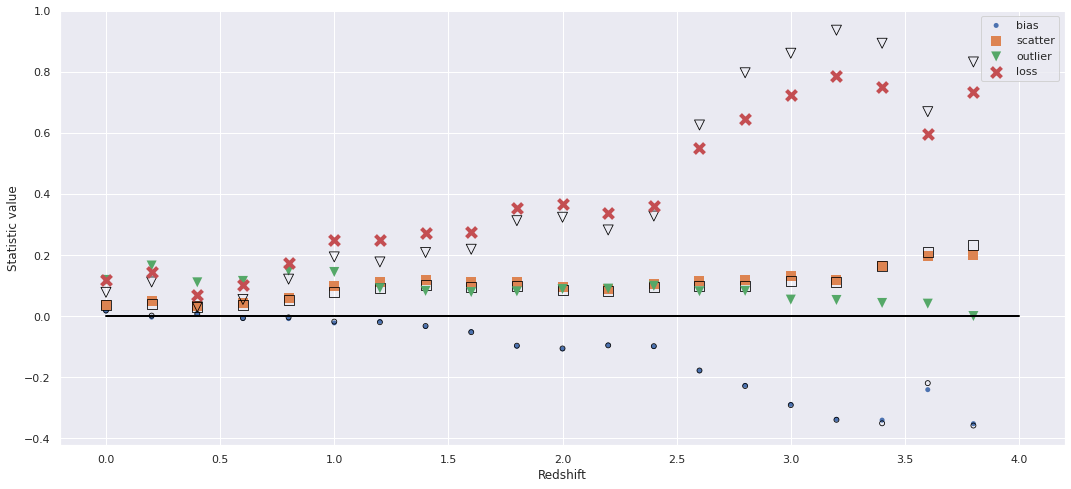

In [16]:
model.plot_metrics(dataset='train')

# 6 Fine tune the model

Most machine learning algorithms will have hyperparameters that can be tuned to improve the performance of the model given the specific dataset. You may also want to visualize the results of model predictions to aid in tuning the model.

In [17]:
model.predict(dataset='val')
model.preds_val

Predicting on val set.


array([0.2272361 , 0.5685792 , 0.45165202, ..., 0.17935754, 0.37709334,
       0.71913314], dtype=float32)

In [18]:
model.print_predictions(dataset='val')

AttributeError: 'RedshiftModel' object has no attribute 'id'

# 7 Present your solution and apply it

Here you will evaluate your model against the test set that was set aside in Step 2 to determine the final performance metrics. Your model is now ready to be applied to new data.